# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [22]:
!pip install folium

In [23]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [10]:
data = pd.read_csv('train.csv')
data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [11]:
data = data.drop(columns=['dropoff_datetime'])

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

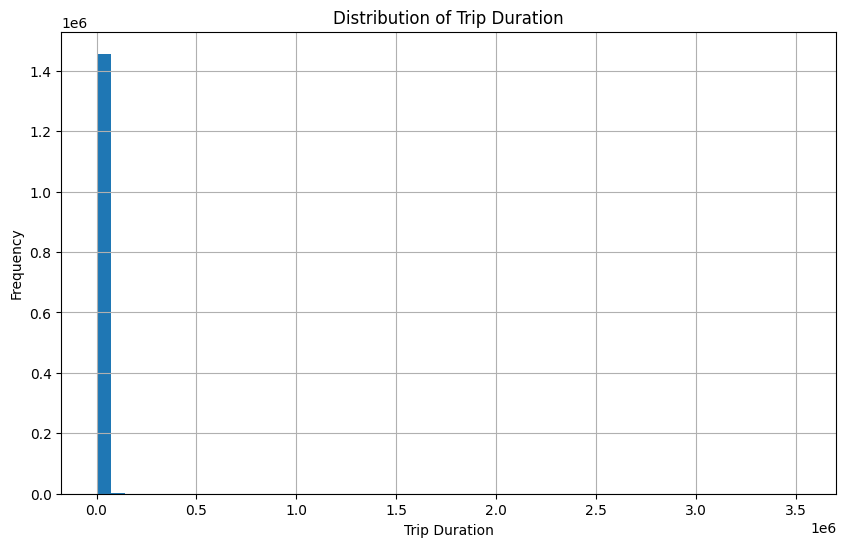

In [22]:
data['trip_duration'].hist(bins=50, figsize=(10, 6))
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Целевая переменная trip_duration имеет сильно скошенное распределение (скошенное вправо) с подавляющим большинством значений, сосредоточенных на малых длительностях поездок, что говорит о том, что большинство данных - короткие поездки.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

RMSLE полезна, когда целевые значения имеют выбросы. Логарифмическое преобразование помогает сгладить влияние больших значений и выбросов, уменьшая значимость ошибок на больших числах, что делает модель менее чувствительной к аномально высоким предсказаниям.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: Формула RMSLE выглядит следующим образом:
$$
RMSLE = \sqrt{\frac{1}{\ell} \sum_{i=1}^{\ell} \left( \log(y_i + 1) - \log(\hat{y}_i + 1) \right)^2}
$$
где $y_i$ — это истинное значение, а $\hat{y}_i$ — предсказание модели.

Если мы будем предсказывать не целевую переменную напрямую, а ее логарифм, то наша задача сводится к минимизации среднеквадратичной ошибки (MSE) для логарифмированного значения целевой переменной:

$$
MSE = \frac{1}{\ell} \sum_{i=1}^{\ell} \left( \log(y_i + 1) - \hat{y}_i \right)^2
$$
где $\hat{y}_i = \log{(y_i + 1)}$, следовательно $$
MSE = {\frac{1}{\ell} \sum_{i=1}^{\ell} \left( \log(y_i + 1) - \log(\hat{y}_i + 1) \right)^2}
$$
И, следовательно, оптимизация RMSLE фактически эквивалентна оптимизации MSE в логарифмическом пространстве.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

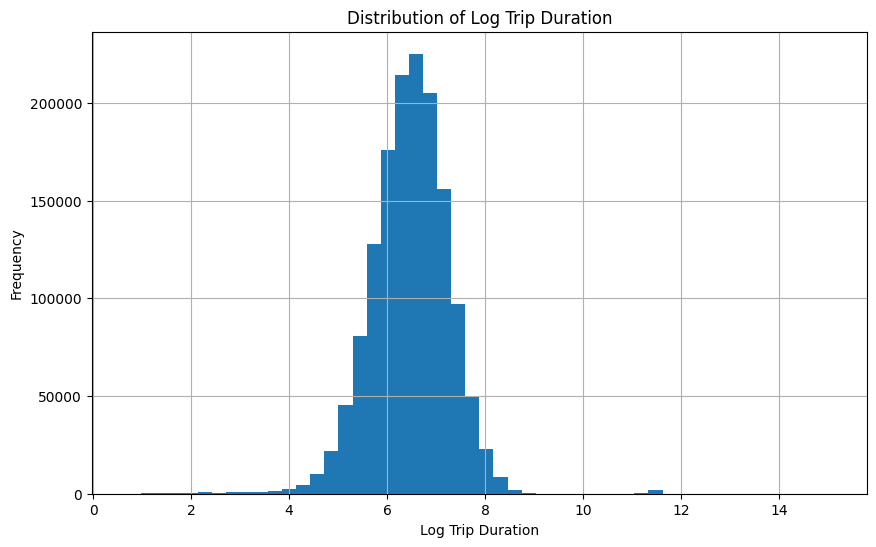

In [12]:
data['trip_duration'] = data['trip_duration'].replace(0, 1)
data['log_trip_duration'] = np.log1p(data['trip_duration'])
data = data.drop(columns=['trip_duration'])

data['log_trip_duration'].hist(bins=50, figsize=(10, 6))
plt.title('Distribution of Log Trip Duration')
plt.xlabel('Log Trip Duration')
plt.ylabel('Frequency')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [13]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean(np.square(log1p_y_true - log1p_y_pred)))

rmsle_best_const = rmsle(data['log_trip_duration'], np.full_like(data['log_trip_duration'], np.median(data['log_trip_duration'])))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-3)

0.7963168959485897


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

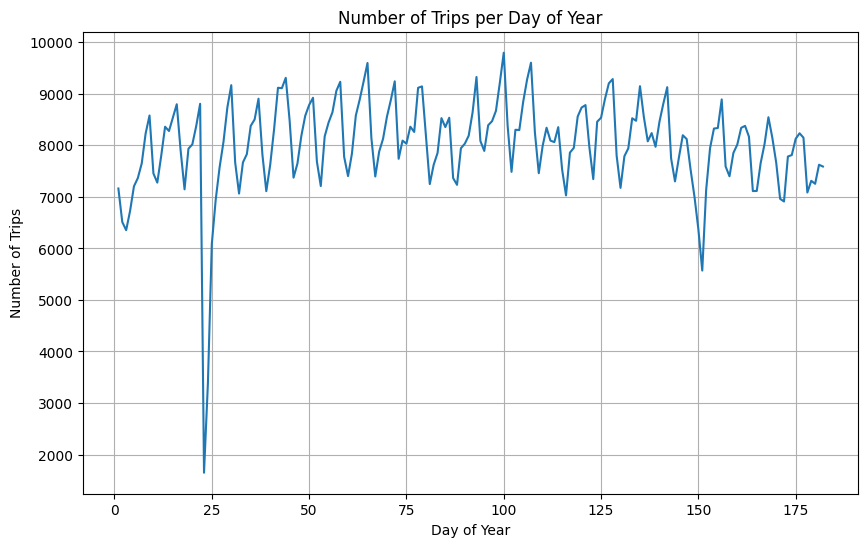

In [14]:
data['day_of_year'] = data['pickup_datetime'].dt.dayofyear

trips_per_day = data.groupby('day_of_year').size()

plt.figure(figsize=(10, 6))
plt.plot(trips_per_day.index, trips_per_day.values)
plt.title('Number of Trips per Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [27]:
min_trips_dates = trips_per_day.nsmallest(4)
print(min_trips_dates)

day_of_year
23     1648
24     3383
151    5570
25     6084
dtype: int64


Аномально малое количество поездок в Нью-Йорке было 23 января, в тот день мер Нью-Йорка [запретил](https://ria.ru/20160123/1364032228.html) автомобильное движение из-за снежной бури; а также 30 мая, в этот день в Нью-Йорке [произошла](https://tass.ru/proisshestviya/3324970) серия нападений со стрельбой.



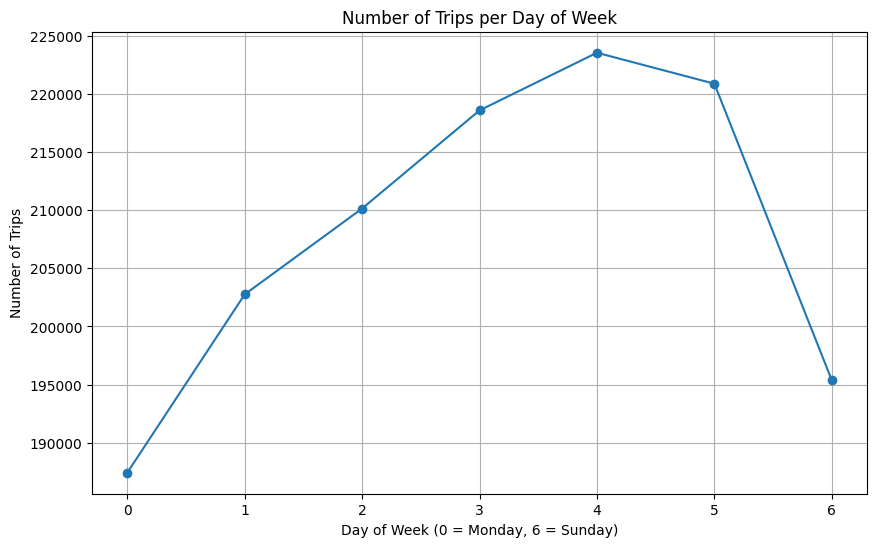

In [15]:
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
trips_per_weekday = data.groupby('day_of_week').size()

plt.figure(figsize=(10, 6))
plt.plot(trips_per_weekday.index, trips_per_weekday.values, marker='o')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Day of Week')
plt.grid(True)
plt.show()

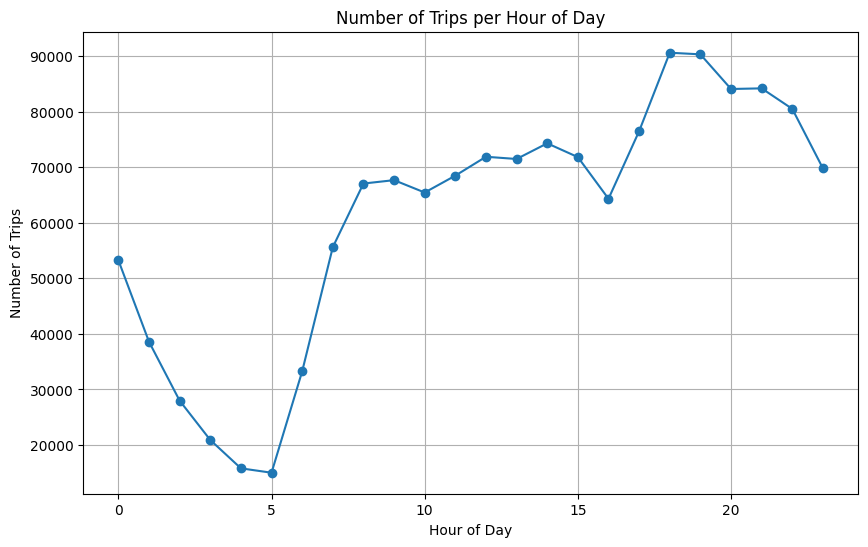

In [16]:
data['hour_of_day'] = data['pickup_datetime'].dt.hour
trips_per_hour = data.groupby('hour_of_day').size()

plt.figure(figsize=(10, 6))
plt.plot(trips_per_hour.index, trips_per_hour.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour of Day')
plt.grid(True)
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

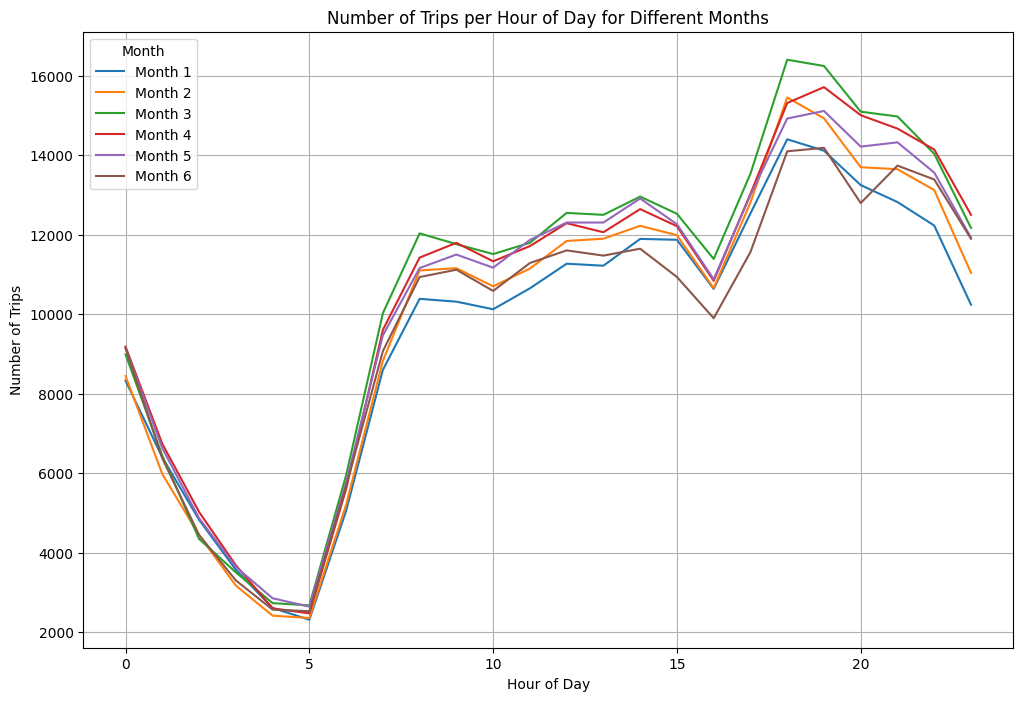

In [17]:
data['month'] = data['pickup_datetime'].dt.month

trips_per_hour_month = data.groupby(['hour_of_day', 'month']).size().unstack()

plt.figure(figsize=(12, 8))
for month in trips_per_hour_month.columns:
    plt.plot(trips_per_hour_month.index, trips_per_hour_month[month], label=f'Month {month}')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour of Day for Different Months')
plt.legend(title="Month")
plt.grid(True)
plt.show()

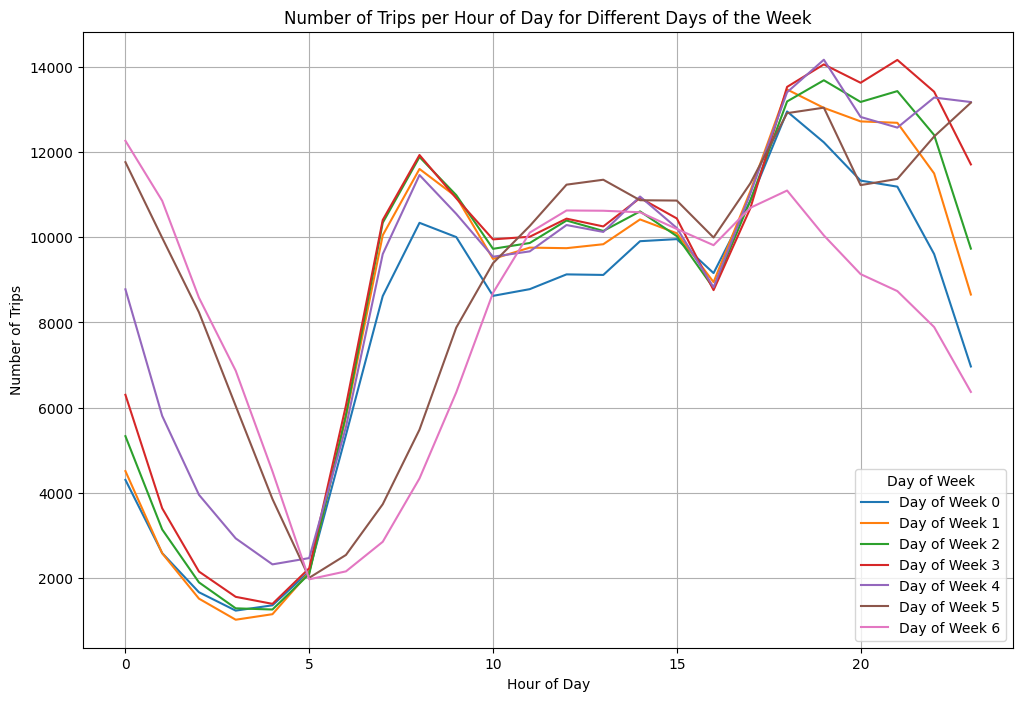

In [31]:
trips_per_hour_weekday = data.groupby(['hour_of_day', 'day_of_week']).size().unstack()

plt.figure(figsize=(12, 8))
for day in trips_per_hour_weekday.columns:
    plt.plot(trips_per_hour_weekday.index, trips_per_hour_weekday[day], label=f'Day of Week {day}')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour of Day for Different Days of the Week')
plt.legend(title="Day of Week")
plt.grid(True)
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

В целом: наблюдается единный патерн роста числа поездок в утреннее время (8:00 - 9:00) и вечернее время (17:00 - 19:00). Большинство людей в эти промежутки начинают и заканчивают рабочий день.

По месяцам: наблюдается схожий тренд активности поездок в течении суток. Заметно повышение в марте - апреле и снижение числа поездок в мае - июне, это может быть объяснено потеплением погоды и желанием людей передвигаться пешком нежели на машине.

По неделям: в пятницу и субботу наблюдается повышение количества поездок в вечернее время, а в субботу после 20:00 количество поездок ростет, а не убывает, как в другие дни недели. По пятницам и субботам люди чаще выходят на отдых или мероприятия. Еще одним интересным наблюдением является то, что в воксресенье общее количество поездок намного меньше, чем в остальные дни. Воскресенье обычно воспринимается, как день, который нужно провести с семьей или просто дома за просмотром сериалов.


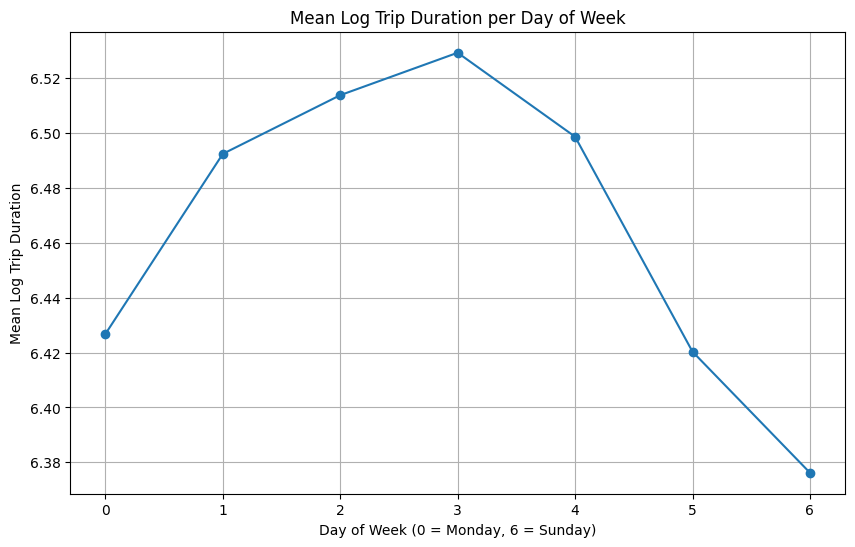

In [18]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

mean_log_trip_duration_weekday = train_data.groupby('day_of_week')['log_trip_duration'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_log_trip_duration_weekday.index, mean_log_trip_duration_weekday.values, marker='o')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Mean Log Trip Duration')
plt.title('Mean Log Trip Duration per Day of Week')
plt.grid(True)
plt.show()

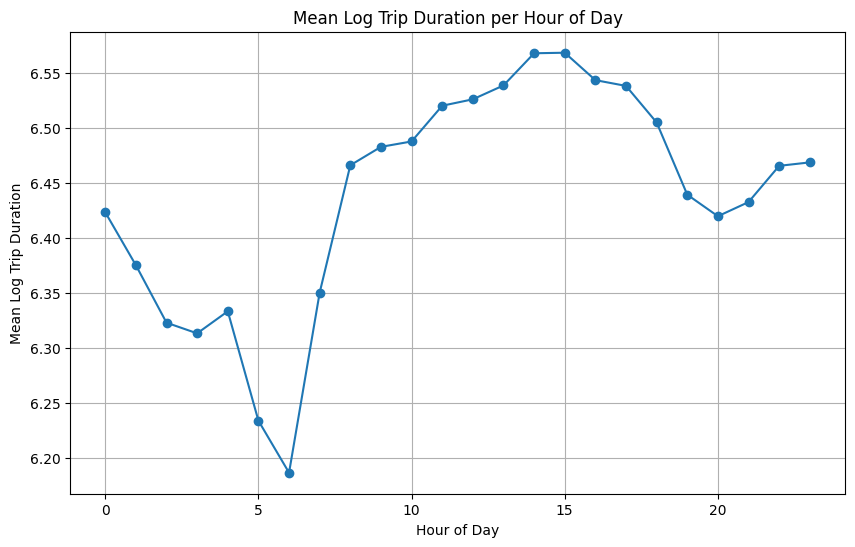

In [33]:
mean_log_trip_duration_hour = train_data.groupby('hour_of_day')['log_trip_duration'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_log_trip_duration_hour.index, mean_log_trip_duration_hour.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Log Trip Duration')
plt.title('Mean Log Trip Duration per Hour of Day')
plt.grid(True)
plt.show()

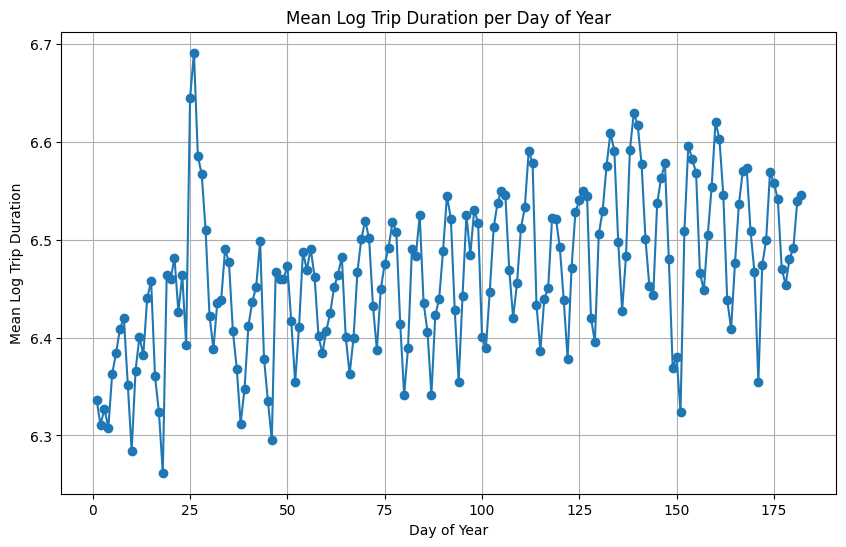

In [34]:
mean_log_trip_duration_dayofyear = train_data.groupby('day_of_year')['log_trip_duration'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_log_trip_duration_dayofyear.index, mean_log_trip_duration_dayofyear.values, marker='o')
plt.xlabel('Day of Year')
plt.ylabel('Mean Log Trip Duration')
plt.title('Mean Log Trip Duration per Day of Year')
plt.grid(True)
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

В целом, наблюдается схожий паттерн в зависимости продолжительности поездок от дня недели, аналогичный графику для количества поездок. Продолжительность поездок имеет тенденцию к снижению по мере приближения к выходным, что может отражать изменения в поведенческих и социальных паттернах пользователей в будние и выходные дни.

Однако зависимость продолжительности поездок от времени суток показывает иную картину. Хотя, как и в случае с количеством поездок, в период с 00:00 до 05:00 продолжительность поездок низкая, существует отличительная тенденция в период с 10:00 до 15:00: наблюдается рост средней продолжительности поездок на фоне уменьшения их количества. После 18:00 происходит обратный процесс – продолжительность поездок снижается, тогда как их количество возрастает. Эти изменения могут быть связаны с поведенческими особенностями пользователей в разные временные промежутки суток и, возможно, с изменением целей поездок.

Относительно двух аномальных точек в данных: 23 января зафиксирована повышенная продолжительность поездок, вероятно, из-за снежной бури, которая ограничила скорость передвижения. Вторая аномальная точка, 30 мая, демонстрирует заметное снижение средней продолжительности поездок. В этот день, ввиду инцидента со стрельбой, число заказов на такси значительно снизилось, а заказы были преимущественно на короткие поездки.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [19]:
#признаки "день недели", "месяц", "час" и "номер дня в году" были добавлены ранее для построения графиков, поэтому найдем признак, являлся ли период аномальным
train_data['is_anomalous_jan23'] = np.where(train_data['pickup_datetime'].dt.date == pd.to_datetime("2023-01-23").date(), 1, 0)
train_data['is_anomalous_may30'] = np.where(train_data['pickup_datetime'].dt.date == pd.to_datetime("2023-05-30").date(), 1, 0)

train_data.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_year,day_of_week,hour_of_day,month,is_anomalous_jan23,is_anomalous_may30
1011257,id2209155,2,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,N,6.739337,124,1,9,5,0,0
178550,id0586605,1,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,N,6.909753,1,4,16,1,0,0
551460,id0467144,1,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,N,6.955593,115,6,13,4,0,0


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Категориальными являются те признаки, которые обозначают дискретные значения или группы, к которым относится наблюдение. К таким признакам относятся id, поскольку он уникален для каждой записи и не несет числового значения, а также vendor_id, который обозначает идентификатор поставщика и отображает различные компании, поэтому его следует рассматривать как категорию. Признак pickup_datetime представляет собой временную метку начала поездки и также может быть преобразован в категориальные элементы, такие как день недели, месяц и час, чтобы отразить временные интервалы. Аналогичным образом, store_and_fwd_flag, показывающий, было ли перенаправление данных, следует рассматривать как категориальный. К этому же типу относятся признаки, отражающие временные характеристики (day_of_week, hour_of_day, month), и бинарные признаки для аномальных событий (is_anomalous_jan23, is_anomalous_may30).

Численные признаки представляют количественные данные. Среди них – passenger_count, показывающий число пассажиров, и географические координаты (pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude), которые выражают точные числовые значения, важные для пространственного анализа поездки. Логарифм продолжительности поездки (log_trip_duration) также относится к численным признакам, так как он выражает количественную характеристику времени, затраченного на поездку.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = train_data.drop(columns=['log_trip_duration'])
y = train_data['log_trip_duration']


numerical_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
categorical_features = ['day_of_week', 'hour_of_day', 'month']
binary_features = ['is_anomalous_jan23', 'is_anomalous_may30']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('binary', 'passthrough', binary_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


log1p_y_test = np.log1p(y_test)
log1p_y_pred = np.log1p(y_pred)

rmsle_value = rmsle(log1p_y_test, log1p_y_pred)

print(f"RMSLE: {rmsle_value}")

RMSLE: 0.11040883814955942


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [24]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [25]:
def get_sample_coordinates(df, sample_size):

    sample_data = df.sample(n=sample_size, random_state=42)

    return sample_data['pickup_latitude'].values, sample_data['pickup_longitude'].values

In [26]:
latitude_values, longitude_values = get_sample_coordinates(df=train_data, sample_size=500)

show_circles_on_map(latitude_values, longitude_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Выделяются точки в районах Queens Boulevard, Borden Avenue, Brooklyn Botanic Garden и West 125th Street, так как они находятся на значительном расстоянии от основных кластеров и представляют собой малочисленные, изолированные вызовы такси. Эти точки могут быть полезны для нашей задачи, поскольку такие локации указывают на редкий спрос и могут помогать выявить особенности распределения поездок в нестандартных местах. Например, Queens Boulevard и Borden Avenue могут представлять промышленную или малообитаемую зону, где такси вызывается редко, а Brooklyn Botanic Garden и West 125th Street могут быть популярными только в определенные периоды, такие как выходные или сезонные мероприятия. Эти скопления показывают места, в которых спрос возникает лишь в специфических ситуациях, а в остальное время они не требуют активного обслуживания, что позволяет лучше планировать распределение автомобилей.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [27]:
pip install haversine

In [28]:
from haversine import haversine
train_data['haversine'] = train_data.apply(lambda row: haversine(
    (row['pickup_latitude'], row['pickup_longitude']),
    (row['dropoff_latitude'], row['dropoff_longitude'])
), axis=1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [29]:
train_data['log_haversine'] = np.log(train_data['haversine'].replace(0, np.nan))

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [50]:
correlation_haversine = train_data['log_trip_duration'].corr(train_data['haversine'])
correlation_log_haversine = train_data['log_trip_duration'].corr(train_data['log_haversine'])

correlation_haversine, correlation_log_haversine

(0.5654059873890243, 0.7725227193327766)

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

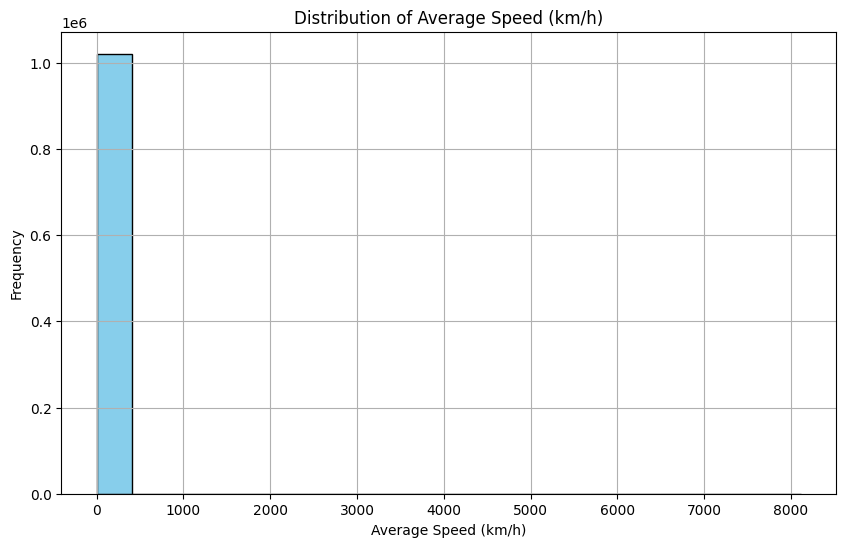

In [30]:
train_data['trip_duration'] = np.exp(train_data['log_trip_duration'])
train_data['avg_speed_kmh'] = train_data['haversine'] / (train_data['trip_duration'] / 3600)

plt.figure(figsize=(10, 6))
plt.hist(train_data['avg_speed_kmh'], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Average Speed (km/h)")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

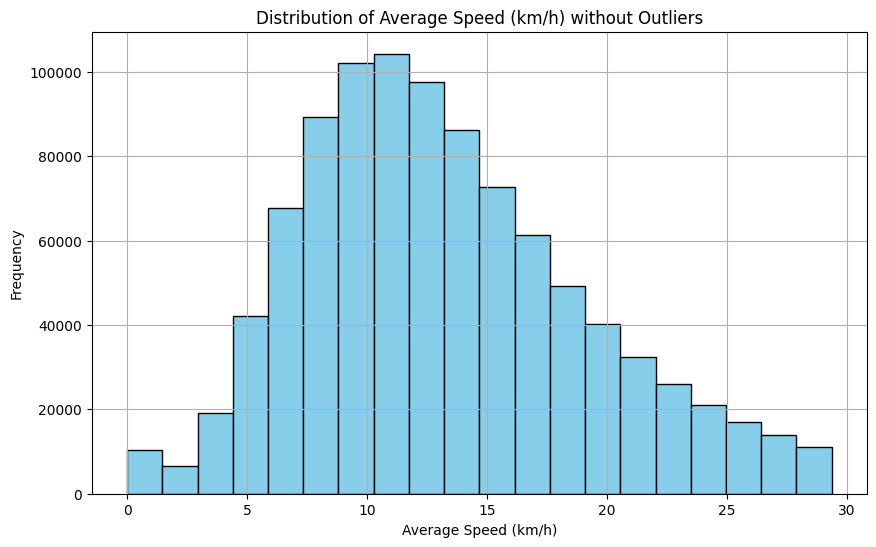

In [31]:
quantile_95 = train_data['avg_speed_kmh'].quantile(0.95)
filtered_data = train_data[train_data['avg_speed_kmh'] <= quantile_95]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['avg_speed_kmh'], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Average Speed (km/h) without Outliers")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

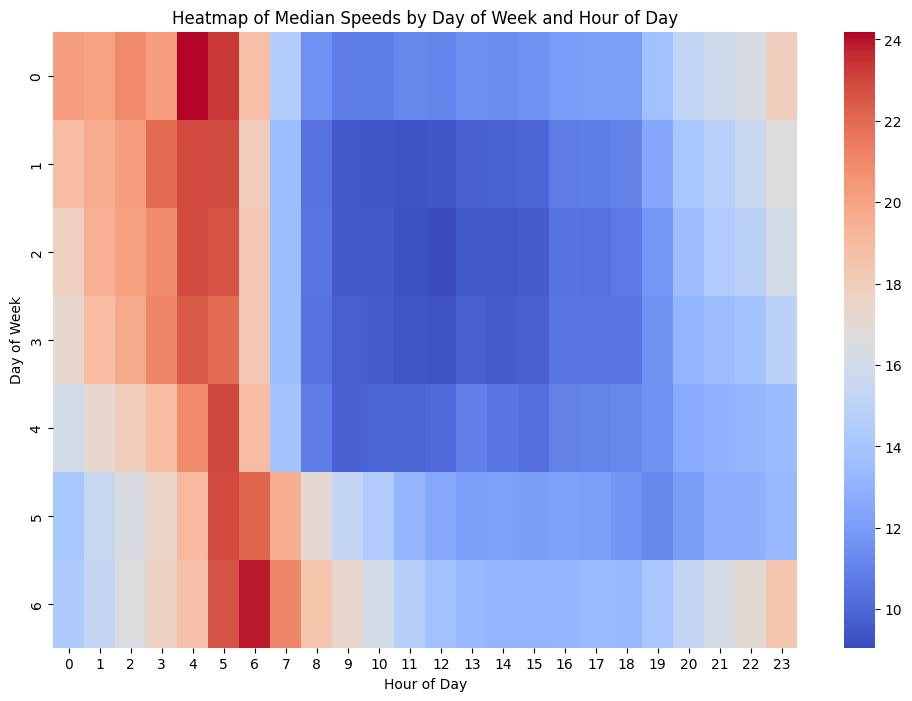

In [32]:
import seaborn as sns
speed_median = train_data.groupby(['day_of_week', 'hour_of_day'])['avg_speed_kmh'].median().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(speed_median, cmap="coolwarm", annot=False, cbar=True)
plt.title("Heatmap of Median Speeds by Day of Week and Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [33]:
train_data = train_data.drop(columns=['avg_speed_kmh'])

Значение скорости нельзя использовать во время обучения, потому что оно напрямую зависит от целевой переменной — времени поездки (trip_duration). Скорость вычисляется как расстояние, деленное на время, и использование скорости в качестве признака приведет к тому, что модель сможет легко "угадывать" целевую переменную. Это вызовет утечку данных (data leakage), когда информация из целевой переменной просачивается в обучающие признаки. В результате модель будет демонстрировать искусственно завышенную точность на обучающих данных, но она не будет работать корректно на новых данных, поскольку фактически обучалась на уже известной целевой переменной.

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [34]:
train_data['rush_hour'] = train_data.apply(
    lambda row: 1 if (row['day_of_week'] < 5 and (7 <= row['hour_of_day'] <= 10 or 10 <= row['hour_of_day'] <= 16 or 17 <= row['hour_of_day'] <= 20)) else 0, axis=1
)


train_data['free_road'] = train_data.apply(
    lambda row: 1 if (row['day_of_week'] >= 5 or (0 <= row['hour_of_day'] <= 6 or row['hour_of_day'] >= 23)) else 0, axis=1
)


Минимальные скорости наблюдаются в будние дни, в период с 10:00 до 16:00. Это может быть связано с повышенной загруженностью городских улиц, когда многие люди перемещаются в течение рабочего дня.

Максимальные скорости, напротив, наблюдаются рано утром, особенно в промежуток с 5:00 до 7:00, когда дороги ещё относительно свободны. Это время, когда большинство людей ещё не начали свой рабочий день, и дорожное движение находится на минимальном уровне.

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [35]:
def in_point_of_interest(lat, lon, point_lat, point_lon, radius_km):
    distance = haversine((lat, lon), (point_lat, point_lon))
    return 1 if distance <= radius_km else 0

#примерные геоданные для интересующих нас точек
points_of_interest = {
    'queens_blvd': (40.7369, -73.8801),
    'borden_ave': (40.7427, -73.9485),
    'brooklyn_botanic_garden': (40.6694, -73.9624),
    'west_125th_st': (40.8116, -73.9465)
}

radius_km = 1.0


for point_name, (lat, lon) in points_of_interest.items():

    train_data[f'start_in_{point_name}'] = train_data.apply(
        lambda row: in_point_of_interest(row['pickup_latitude'], row['pickup_longitude'], lat, lon, radius_km), axis=1
    )


    train_data[f'end_in_{point_name}'] = train_data.apply(
        lambda row: in_point_of_interest(row['dropoff_latitude'], row['dropoff_longitude'], lat, lon, radius_km), axis=1
    )

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

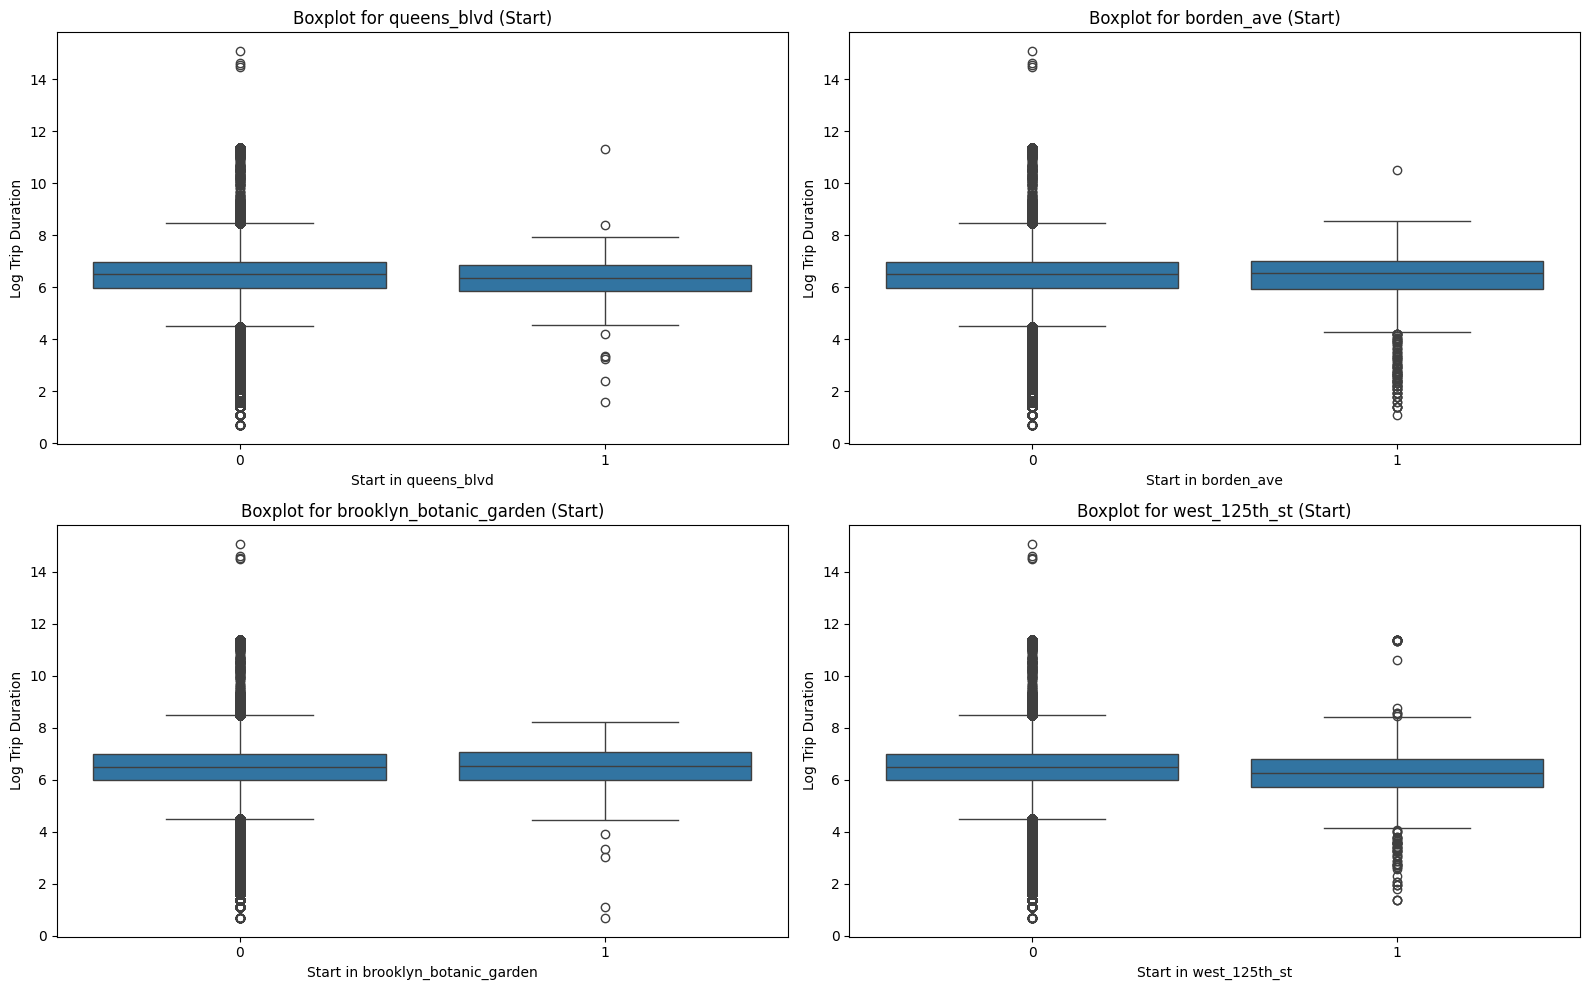

In [36]:
plt.figure(figsize=(16, 10))

for i, point_name in enumerate(points_of_interest.keys(), 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train_data[f'start_in_{point_name}'], y=train_data['log_trip_duration'])
    plt.title(f'Boxplot for {point_name} (Start)')
    plt.xlabel(f'Start in {point_name}')
    plt.ylabel('Log Trip Duration')

plt.tight_layout()
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

На основании графиков можно заключить, что созданные признаки оказались не столь значимыми для предсказания времени поездки. Признаки для Queens Boulevard и Brooklyn Botanic Garden показали незначительные различия в медиане и разбросе времени поездок по сравнению с другими районами, что свидетельствует о слабой предсказательной силе этих признаков. В то же время признаки для Borden Avenue и West 125th Street демонстрируют более выраженные различия, с меньшей медианой и меньшим разбросом, что может сделать их полезными для модели.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows, n_cols):

        self.n_rows = n_rows
        self.n_cols = n_cols
        self.lat_min, self.lat_max = None, None
        self.lon_min, self.lon_max = None, None
        self.cell_width = None
        self.cell_height = None

        pass

    def show_map(self):
        # you may want to visualize cells
        pass

    def fit(self, X=None, y=None):

        self.lat_min, self.lat_max = X[:, 0].min(), X[:, 0].max()
        self.lon_min, self.lon_max = X[:, 1].min(), X[:, 1].max()

        self.cell_width = (self.lon_max - self.lon_min) / self.n_cols
        self.cell_height = (self.lat_max - self.lat_min) / self.n_rows

        return self

    def transform(self, X, y=None):
        start_lat, start_lon = X[:, 0], X[:, 1]
        end_lat, end_lon = X[:, 2], X[:, 3]


        start_row_idx = ((start_lat - self.lat_min) / self.cell_height).astype(int)
        start_col_idx = ((start_lon - self.lon_min) / self.cell_width).astype(int)


        end_row_idx = ((end_lat - self.lat_min) / self.cell_height).astype(int)
        end_col_idx = ((end_lon - self.lon_min) / self.cell_width).astype(int)


        start_cell = np.where(
            (start_row_idx >= 0) & (start_row_idx < self.n_rows) &
            (start_col_idx >= 0) & (start_col_idx < self.n_cols),
            start_row_idx * self.n_cols + start_col_idx,
            -1
        )

        end_cell = np.where(
            (end_row_idx >= 0) & (end_row_idx < self.n_rows) &
            (end_col_idx >= 0) & (end_col_idx < self.n_cols),
            end_row_idx * self.n_cols + end_col_idx,
            -1
        )

        X = np.column_stack((start_cell, end_cell))

        return X

In [34]:
train_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'log_trip_duration',
       'day_of_year', 'day_of_week', 'hour_of_day', 'month',
       'is_anomalous_jan23', 'is_anomalous_may30', 'haversine',
       'log_haversine', 'rush_hour', 'free_road', 'start_in_queens_blvd',
       'end_in_queens_blvd', 'start_in_borden_ave', 'end_in_borden_ave',
       'start_in_brooklyn_botanic_garden', 'end_in_brooklyn_botanic_garden',
       'start_in_west_125th_st', 'end_in_west_125th_st'],
      dtype='object')

In [40]:
problematic_features = ['start_in_queens_blvd', 'end_in_queens_blvd',
                        'start_in_borden_ave', 'end_in_borden_ave', 'start_in_brooklyn_botanic_garden',
                        'end_in_brooklyn_botanic_garden', 'start_in_west_125th_st']
train_data[problematic_features] = train_data[problematic_features].replace('other', 0)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [43]:
from sklearn.impute import SimpleImputer

X = train_data.drop(columns=['log_trip_duration'])
y = train_data['log_trip_duration']


numerical_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'log_haversine']
categorical_features = ['day_of_week', 'hour_of_day', 'month']
binary_features = ['is_anomalous_jan23', 'is_anomalous_may30',
                   'rush_hour', 'free_road', 'start_in_queens_blvd',
                   'end_in_queens_blvd', 'start_in_borden_ave', 'end_in_borden_ave',
                   'start_in_brooklyn_botanic_garden', 'end_in_brooklyn_botanic_garden',
                   'start_in_west_125th_st', 'end_in_west_125th_st']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('binary', binary_transformer, binary_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


log1p_y_test = np.log1p(y_test)
log1p_y_pred = np.log1p(y_pred)

rmsle_value = rmsle(log1p_y_test, log1p_y_pred)

print(f"RMSLE: {rmsle_value}")

RMSLE: 0.07308183003325314


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [70]:
print(f"Уникальные значения для 'vendor_id': {train_data['vendor_id'].nunique()}")
print(f"Уникальные значения для 'passenger_count': {train_data['passenger_count'].nunique()}")
print(f"Уникальные значения для 'store_and_fwd_flag': {train_data['store_and_fwd_flag'].nunique()}")

Уникальные значения для 'vendor_id': 2
Уникальные значения для 'passenger_count': 10
Уникальные значения для 'store_and_fwd_flag': 2


Признак **vendor_id** может быть полезен, поскольку разные люди могут предпочитать разных поставщиков услуг такси, соотвественно, будут разные марштруты. Признак **passenger_count** важен, так как количество пассажиров может влиять на выбор автомобиля, а также на стоимость поездки из-за возможных дополнительных сборов или задержек при загрузке/выгрузке пассажиров. Признак **store_and_fwd_flag** указывает, была ли информация о поездке сохранена на устройстве перед передачей на сервер, что может сигнализировать о задержке в данных или проблемах с соединением, потенциально влияя на точность данных.

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

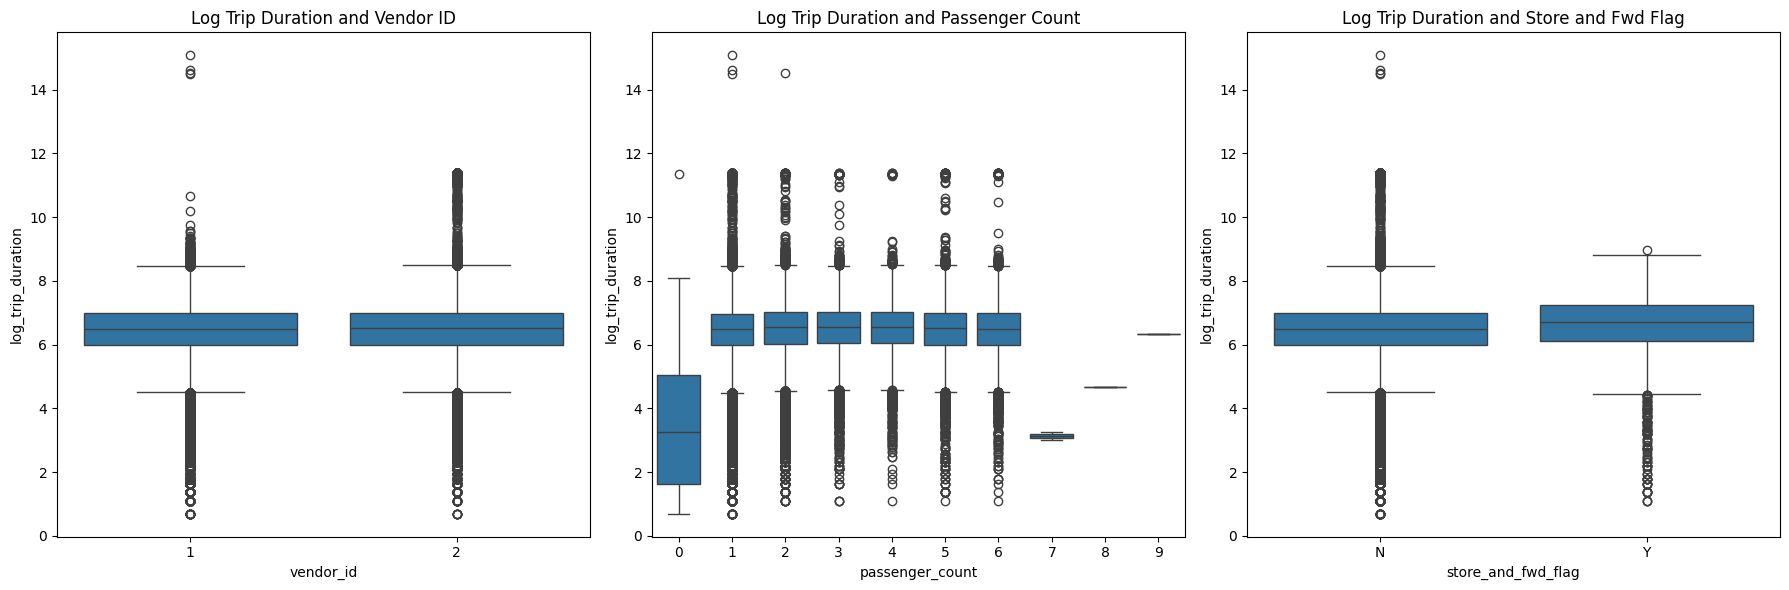

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='vendor_id', y='log_trip_duration', data=train_data, ax=axes[0])
axes[0].set_title('Log Trip Duration and Vendor ID')

sns.boxplot(x='passenger_count', y='log_trip_duration', data=train_data, ax=axes[1])
axes[1].set_title('Log Trip Duration and Passenger Count')

sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=train_data, ax=axes[2])
axes[2].set_title('Log Trip Duration and Store and Fwd Flag')

plt.tight_layout()
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [44]:
train_data['vendor_id_binary'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)

train_data['store_and_fwd_flag_binary'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Признак passenger_count показывает определенную зависимость, хотя и не сильную, между количеством пассажиров и логарифмом времени поездки, что делает его потенциально полезным для модели. Однако для признаков vendor_id и store_and_fwd_flag различия в распределении времени поездки минимальны, что говорит о том, что они, скорее всего, не будут сильными предикторами и окажут слабое влияние на модель.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [45]:
problematic_features = ['store_and_fwd_flag_binary', 'start_in_queens_blvd', 'end_in_queens_blvd',
                        'start_in_borden_ave', 'end_in_borden_ave', 'start_in_brooklyn_botanic_garden',
                        'end_in_brooklyn_botanic_garden', 'start_in_west_125th_st']
train_data[problematic_features] = train_data[problematic_features].replace('other', 0)

In [48]:
X = train_data.drop(columns=['log_trip_duration'])
y = train_data['log_trip_duration']


numerical_features = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'log_haversine']
categorical_features = ['day_of_week', 'hour_of_day', 'month']
binary_features = ['vendor_id_binary', 'store_and_fwd_flag_binary', 'is_anomalous_jan23',
                   'is_anomalous_may30', 'rush_hour', 'free_road',
                   'start_in_queens_blvd', 'end_in_queens_blvd',
                   'start_in_borden_ave', 'end_in_borden_ave',
                   'start_in_brooklyn_botanic_garden', 'end_in_brooklyn_botanic_garden',
                   'start_in_west_125th_st', 'end_in_west_125th_st']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('binary', binary_transformer, binary_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


log1p_y_test = np.log1p(y_test)
log1p_y_pred = np.log1p(y_pred)


rmsle_value = rmsle(log1p_y_test, log1p_y_pred)

print(f"RMSLE: {rmsle_value}")

RMSLE: 0.07307927399461744


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

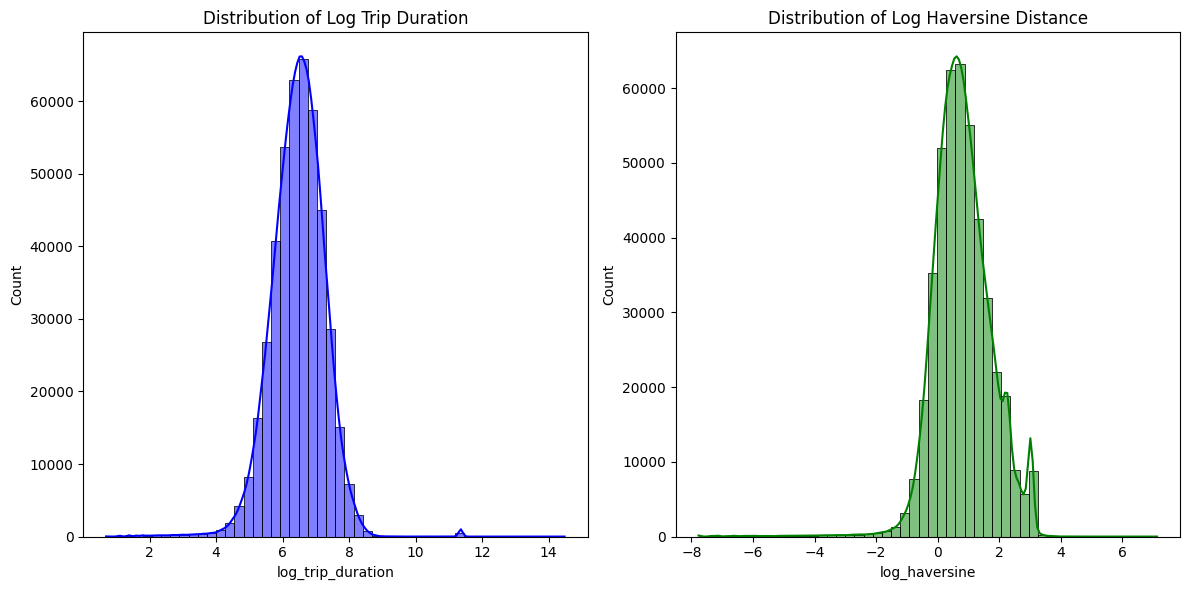

In [47]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(train_data['log_trip_duration'], bins=50, kde=True, color='blue')
plt.title('Distribution of Log Trip Duration')


plt.subplot(1, 2, 2)
sns.histplot(train_data['log_haversine'], bins=50, kde=True, color='green')
plt.title('Distribution of Log Haversine Distance')

plt.tight_layout()
plt.show()

In [63]:
lower_log_trip_duration, upper_log_trip_duration = np.percentile(train_data['log_trip_duration'], [1, 99])

cleaned_train_data = train_data[
    (train_data['log_trip_duration'] >= lower_log_trip_duration) &
    (train_data['log_trip_duration'] <= upper_log_trip_duration) &
    (train_data['log_haversine'] >= 0)
]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [64]:
threshold = 0.01 * len(train_data)


def replace_rare_categories(column, threshold):

    value_counts = column.value_counts()
    rare_categories = value_counts[value_counts < threshold].index

    return column.apply(lambda x: 'other' if x in rare_categories else x)

for feature in categorical_features:
    cleaned_train_data[feature] = replace_rare_categories(cleaned_train_data[feature], threshold)

<ipython-input-64-64616ef7647d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_train_data[feature] = replace_rare_categories(cleaned_train_data[feature], threshold)


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [69]:
X = cleaned_train_data.drop(columns=['log_trip_duration'])
y = cleaned_train_data['log_trip_duration']


numerical_features = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'log_haversine']
categorical_features = ['day_of_week', 'hour_of_day', 'month']
binary_features = ['vendor_id_binary', 'store_and_fwd_flag_binary', 'is_anomalous_jan23',
                   'is_anomalous_may30', 'rush_hour', 'free_road',
                   'start_in_queens_blvd', 'end_in_queens_blvd',
                   'start_in_borden_ave', 'end_in_borden_ave',
                   'start_in_brooklyn_botanic_garden', 'end_in_brooklyn_botanic_garden',
                   'start_in_west_125th_st', 'end_in_west_125th_st']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('binary', binary_transformer, binary_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


log1p_y_test = np.log1p(y_test)
log1p_y_pred = np.log1p(y_pred)


rmsle_value = rmsle(log1p_y_test, log1p_y_pred)

print(f"RMSLE: {rmsle_value}")

RMSLE: 0.048180691333591076


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [70]:
num_features_before = len(numerical_features) + len(binary_features) + len(categorical_features)

X_transformed = preprocessor.fit_transform(X)
num_features_after = X_transformed.shape[1]

print(f'Количество признаков до кодирования: {num_features_before}')
print(f'Количество признаков после кодирования: {num_features_after}')

Количество признаков до кодирования: 22
Количество признаков после кодирования: 56


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [70]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

model_lasso.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)

log1p_y_pred = np.log1p(y_pred_lasso)

rmsle_value = rmsle(log1p_y_test, log1p_y_pred)

print(f"RMSLE: {rmsle_value}")

RMSLE: 0.08082642362366319


Ridge-регрессия показала себя лучше, чем Lasso-регрессия, что можно объяснить особенностями данных и самих методов. В данном случае, после OneHot-кодирования у нас получилось много признаков, и Ridge-регрессия, которая накладывает штраф на сумму квадратов коэффициентов, лучше справляется с такими ситуациями, так как уменьшает влияние менее значимых признаков, не исключая их полностью. Это особенно полезно, когда большинство признаков оказывают хотя бы незначительное влияние на предсказание. Кроме того, Ridge-регрессия лучше работает с коррелированными признаками, так как она сохраняет их, а не обнуляет, как это делает Lasso.

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [72]:
from sklearn.model_selection import GridSearchCV

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


param_grid = {'regressor__alpha': np.logspace(-4, 4, 10)}


ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
ridge_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_search.fit(X_train, y_train)
best_ridge_alpha = ridge_search.best_params_['regressor__alpha']


lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])
lasso_search = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_search.fit(X_train, y_train)
best_lasso_alpha = lasso_search.best_params_['regressor__alpha']


if ridge_search.best_score_ > lasso_search.best_score_:

    best_model = ridge_search.best_estimator_
    best_model_name = "Ridge"
else:

    best_model = lasso_search.best_estimator_
    best_model_name = "Lasso"


y_pred = best_model.predict(X_test)


log1p_y_test = np.log1p(y_test)
log1p_y_pred = np.log1p(y_pred)

rmsle_value = rmsle(log1p_y_test, log1p_y_pred)

print(f"RMSLE: {rmsle_value}")
print(best_model_name, best_ridge_alpha, best_lasso_alpha)

RMSLE: 0.04819098975444541
Ridge 21.54434690031882 0.0001


Сохраните наилучшее значение, как бенчмарк на будущее

In [73]:
best_rmsle = rmsle_value

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

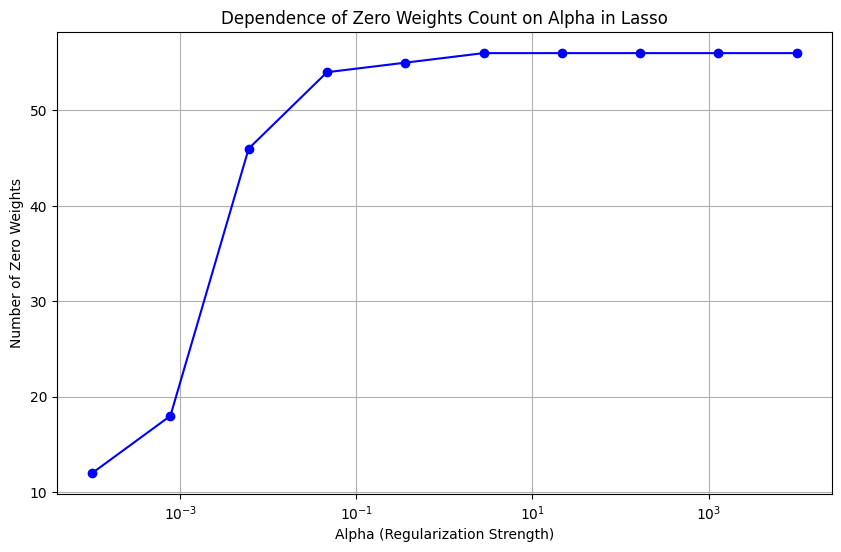

Alpha: 0.0001, Zero Weights: 12, RMSLE: 0.0484
Alpha: 0.0008, Zero Weights: 18, RMSLE: 0.0486
Alpha 0.0008 удаляет хотя бы половину признаков. RMSLE при этом: 0.0486


In [74]:
alphas = np.logspace(-4, 4, 10)
zero_weights_count = []
rmsle_scores = []

for alpha in alphas:

    lasso_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=alpha))
    ])


    lasso_model.fit(X_train_full, y_train_full)


    lasso_weights = lasso_model.named_steps['regressor'].coef_
    zero_weights = np.sum(lasso_weights == 0)
    zero_weights_count.append(zero_weights)


    y_val_pred = lasso_model.predict(X_val)
    rmsle_value = rmsle(np.log1p(y_val), np.log1p(np.maximum(0, y_val_pred)))
    rmsle_scores.append(rmsle_value)

plt.figure(figsize=(10, 6))
plt.plot(alphas, zero_weights_count, marker='o', linestyle='-', color='blue')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Number of Zero Weights')
plt.title('Dependence of Zero Weights Count on Alpha in Lasso')
plt.grid(True)
plt.show()


total_features = len(X_train_full.columns)
half_features = total_features / 2

for alpha, zeros, rmsle in zip(alphas, zero_weights_count, rmsle_scores):
    print(f"Alpha: {alpha:.4f}, Zero Weights: {zeros}, RMSLE: {rmsle:.4f}")
    if zeros >= half_features:
        print(f"Alpha {alpha:.4f} удаляет хотя бы половину признаков. RMSLE при этом: {rmsle:.4f}")
        break

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [77]:
cleaned_train_data['start_cell'] = list(zip(
    cleaned_train_data['pickup_latitude'].round(2),
    cleaned_train_data['pickup_longitude'].round(2)
))
cleaned_train_data['end_cell'] = list(zip(
    cleaned_train_data['dropoff_latitude'].round(2),
    cleaned_train_data['dropoff_longitude'].round(2)
))

cleaned_train_data['route_pair'] = list(zip(cleaned_train_data['start_cell'], cleaned_train_data['end_cell']))

pair_counts = cleaned_train_data['route_pair'].value_counts()


top_100_pairs = pair_counts.head(100).index

pair_to_category = {pair: idx for idx, pair in enumerate(top_100_pairs)}


def encode_route_pair(pair):
    if pair in pair_to_category:
        return pair_to_category[pair]
    else:
        return -1

cleaned_train_data['encoded_route'] = cleaned_train_data['route_pair'].apply(encode_route_pair)

Такой признак может быть полезным, потому что он явно захватывает взаимодействие между точками начала и конца поездки, которое линейная модель не может обнаружить самостоятельно. Хотя у модели есть отдельные признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка", линейная модель обрабатывает их независимо. Это значит, что она будет пытаться предсказать целевую переменную на основе отдельного вклада этих признаков, не учитывая, как именно они связаны друг с другом.

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [82]:
def calculate_rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean(np.square(log1p_y_true - log1p_y_pred)))

In [81]:
X = cleaned_train_data.drop(columns=['log_trip_duration'])
y = cleaned_train_data['log_trip_duration']


numerical_features = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'log_haversine']
categorical_features = ['day_of_week', 'hour_of_day', 'month']
binary_features = ['vendor_id_binary', 'store_and_fwd_flag_binary', 'is_anomalous_jan23',
                   'is_anomalous_may30', 'rush_hour', 'free_road',
                   'start_in_queens_blvd', 'end_in_queens_blvd',
                   'start_in_borden_ave', 'end_in_borden_ave',
                   'start_in_brooklyn_botanic_garden', 'end_in_brooklyn_botanic_garden',
                   'start_in_west_125th_st', 'end_in_west_125th_st', 'encoded_route']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('binary', binary_transformer, binary_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


log1p_y_test = np.log1p(y_test)
log1p_y_pred = np.log1p(y_pred)


rmsle_value_f = calculate_rmsle(log1p_y_test, log1p_y_pred)

print(f"RMSLE: {rmsle_value_f}")

RMSLE: 0.04817278839806032


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

### Manhattan Distance

Manhattan Distance is the sum of absolute differences between points across all the dimensions. This is also called the Manhattan distance or taxicab measure (or $l_1$ norm), by virtue of the analogy to distance in an urban neighbourhood.

In high dimensional space $D_{\text{max}_d^k} - D_{\text{min}_d^k}$ increases at the rate of $d^{1/k - 1/2}$, independent of the data distribution. This means that for the Manhattan distance metric, the value of this expression diverges to $\infty$; for the Euclidean distance metric, the expression is bounded by constants, whereas for all other distance metrics, it converges to $0$. Higher norm parameters provide poorer contrast between the furthest and nearest neighbor.




Истоники: https://medium.com/analytics-vidhya/euclidean-and-manhattan-distance-metrics-in-machine-learning-a5942a8c9f2f

https://www.sciencedirect.com/topics/computer-science/manhattan-distance

Aggarwal, C.C., Hinneburg, A., Keim, D.A. (2001). On the Surprising Behavior of Distance Metrics in High Dimensional Space. In: Van den Bussche, J., Vianu, V. (eds) Database Theory — ICDT 2001. ICDT 2001. Lecture Notes in Computer Science, vol 1973. Springer, Berlin, Heidelberg. https://doi.org/10.1007/3-540-44503-X_27



In [83]:
cleaned_train_data['manhattan_distance'] = (
    np.abs(cleaned_train_data['pickup_longitude'] - cleaned_train_data['dropoff_longitude']) +
    np.abs(cleaned_train_data['pickup_latitude'] - cleaned_train_data['dropoff_latitude'])
)


cleaned_train_data['log_manhattan_distance'] = np.log1p(cleaned_train_data['manhattan_distance'])

In [84]:
corr_manhattan = cleaned_train_data['manhattan_distance'].corr(cleaned_train_data['log_trip_duration'])
print(f"Корреляция Манхэттенского расстояния с логарифмом времени поездки: {corr_manhattan}")

corr_log_manhattan = cleaned_train_data['log_manhattan_distance'].corr(cleaned_train_data['log_trip_duration'])
print(f"Корреляция логарифма Манхэттенского расстояния с логарифмом времени поездки: {corr_log_manhattan}")

corr_log_haversine = cleaned_train_data['log_haversine'].corr(cleaned_train_data['log_trip_duration'])
print(f"Корреляция логарифма haversine расстояния с логарифмом времени поездки: {corr_log_haversine}")

Корреляция Манхэттенского расстояния с логарифмом времени поездки: 0.5610623885151912
Корреляция логарифма Манхэттенского расстояния с логарифмом времени поездки: 0.6302264438716397
Корреляция логарифма haversine расстояния с логарифмом времени поездки: 0.7475597504899909


Наибольшая корреляция с логарифмом haversine расстояния объясняется тем, что haversine расстояние лучше учитывает реальные географические расстояния на поверхности Земли, поскольку оно основано на сферической модели, а не на прямолинейных или сеточных перемещениях, как Манхэттенское расстояние.

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [85]:
X = cleaned_train_data.drop(columns=['log_trip_duration'])
y = cleaned_train_data['log_trip_duration']


numerical_features = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'log_haversine', 'log_manhattan_distance']
categorical_features = ['day_of_week', 'hour_of_day', 'month']
binary_features = ['vendor_id_binary', 'store_and_fwd_flag_binary', 'is_anomalous_jan23',
                   'is_anomalous_may30', 'rush_hour', 'free_road',
                   'start_in_queens_blvd', 'end_in_queens_blvd',
                   'start_in_borden_ave', 'end_in_borden_ave',
                   'start_in_brooklyn_botanic_garden', 'end_in_brooklyn_botanic_garden',
                   'start_in_west_125th_st', 'end_in_west_125th_st', 'encoded_route']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('binary', binary_transformer, binary_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


log1p_y_test = np.log1p(y_test)
log1p_y_pred = np.log1p(y_pred)


rmsle_value_f = calculate_rmsle(log1p_y_test, log1p_y_pred)

print(f"RMSLE: {rmsle_value_f}")

RMSLE: 0.04790422870727673


Включение манхэттенского расстояния улучшило качество модели, потому что оно дополняет информацию о перемещении, учитываемую другими признаками. Манхэттенское расстояние хорошо отражает реальные маршруты в городских условиях, особенно там, где улицы организованы в сетку, и такси движется по прямоугольным маршрутам вдоль улиц. В сочетании с haversine, модель получает более точную информацию о возможных маршрутах, и это помогает скорректировать предсказания времени поездки.

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

![Текст ссылки](https://thunderdungeon.com/wp-content/uploads/2024/05/programmer-memes-banner-20240501.jpg)